In [69]:
#Standard imports

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [37]:
# Modelling imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Split into X and y where we select math score as y which we want to predict
### "We can also use average score as the target variable"

In [45]:
X = df.drop(columns = 'math score', axis = 1)
y = df['math score']

In [46]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [47]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

# Preprocessing

In [48]:
categorical_columns = X.select_dtypes(include = 'O').columns
numerical_columns = X.select_dtypes(exclude = 'O').columns
print(categorical_columns)
print(numerical_columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
Index(['reading score', 'writing score'], dtype='object')


In [49]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('categorical_transformer', categorical_transformer, categorical_columns),
        ('numerical_transformer', numeric_transformer, numerical_columns)
    ]
)

In [50]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [51]:
X.shape

(1000, 19)

# Train Test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Evalutaion function to automate evaluation metrics of a model

In [53]:
def evaluate(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true,pred))
    mae = mean_absolute_error(true,pred)
    r2 = r2_score(true,pred)

    return mae, rmse, r2

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_name = []
r2_value = []

In [77]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make predictions
    pred = model.predict(X_test)
    mae, rmse, r2 = evaluate(y_test, pred)

    model_name.append(list(models.keys())[i])
    r2_value.append(r2)

    print(list(models.values())[i])
    print('Accuracy metrics : ')
    print('Mean Absolute error : {:.4f}'.format(mae))
    print('Root Mean Squared error : {:.4f}'.format(rmse))
    print('R2 Score : {:.4f}'.format(r2))
    print('='*30,'\n')

LinearRegression()
Accuracy metrics : 
Mean Absolute error : 4.2158
Root Mean Squared error : 5.3960
R2 Score : 0.8803

Lasso()
Accuracy metrics : 
Mean Absolute error : 5.1579
Root Mean Squared error : 6.5197
R2 Score : 0.8253

Ridge()
Accuracy metrics : 
Mean Absolute error : 4.2111
Root Mean Squared error : 5.3904
R2 Score : 0.8806

KNeighborsRegressor()
Accuracy metrics : 
Mean Absolute error : 5.6210
Root Mean Squared error : 7.2530
R2 Score : 0.7838

DecisionTreeRegressor()
Accuracy metrics : 
Mean Absolute error : 6.3400
Root Mean Squared error : 8.0467
R2 Score : 0.7339

RandomForestRegressor()
Accuracy metrics : 
Mean Absolute error : 4.6373
Root Mean Squared error : 6.0131
R2 Score : 0.8514

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             ga

In [78]:
print(r2_value)
print(model_name)

[0.8803449074540941, 0.8253197323627853, 0.8805931485028737, 0.7838129945787431, 0.7339096501004363, 0.8514113987369715, 0.8277965653186071, 0.8516318920747058, 0.8497632440616146]
['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoosting Regressor', 'AdaBoost Regressor']


In [79]:
df = pd.DataFrame({'model_name': model_name, 'r2_value': r2_value}).sort_values(by = 'r2_value', ascending=False)

In [80]:
df

,model_name,r2_value
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851411
8,AdaBoost Regressor,0.849763
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.733910


### Best performing models are RigdeRegression and LinearRegression <br>

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2_score(y_test,pred)

0.8803449074540941

Text(0, 0.5, 'Predicted')

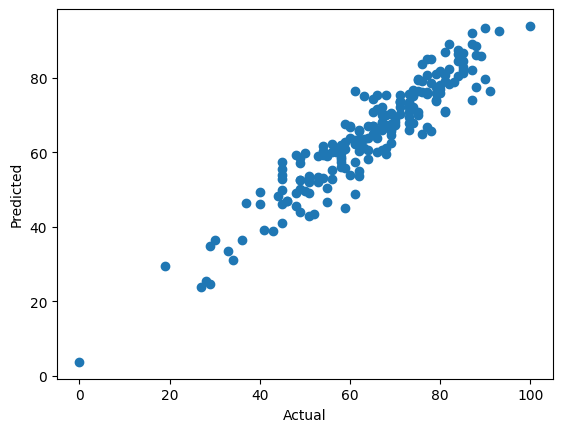

In [86]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

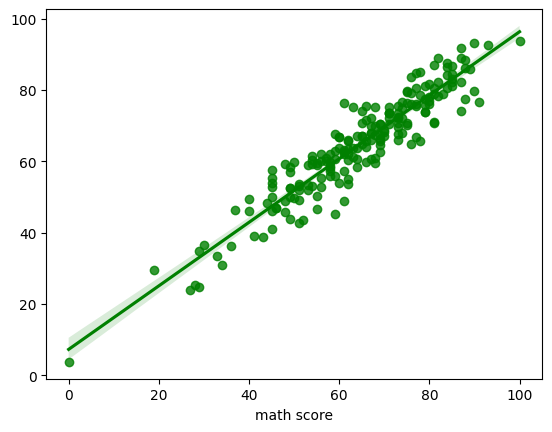

In [91]:
sns.regplot(x = y_test, y = pred, color='green')